In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# Gibbs SeaWater (GSW) Oceanographic Toolbox of TEOS-10. 
import gsw

In [2]:
# typical range of values within the datasets

# temperature (degrees C)
t_vals = np.linspace(7, 12, 100)

# conductivity (microSiemens per centimeter)
c_vals = np.linspace(.284, .314 , 100)

# pressure (decibar)
p_vals = np.linspace(0, 4, 100)

In [3]:
# retrieve the actual measurements of 
# cond., pres., and temp. from the CTD files,
# includes other values like Salinity (PSS) and Density

# SALINITY and DENSITY are DERIVED PARAMETERS - they are
# calculated for seawater/saline conditions

total_df = pd.read_csv('../data/total_df.csv') # load in data

# Keystone Cove
KEY_Full = total_df[total_df['Area'] == 'KEY'].copy() # filter by area
KEY_Full['UTC Time'] = pd.to_datetime(KEY_Full['UTC Time'])
KEY_18 = KEY_Full[KEY_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-18').date()]

# Harding Cove
HAR_Full = total_df[total_df['Area'] == 'HAR'].copy()
HAR_Full['UTC Time'] = pd.to_datetime(HAR_Full['UTC Time'])
HAR_17 = HAR_Full[HAR_Full['UTC Time'].dt.date == pd.to_datetime('2025-05-17').date()]

We want to compare the International Equation of State for Seawater to an equation that finds density via Total Disolved Solids (TDS). 

In [124]:
alpha = 0.75

TDS_har17 = (0.64 * HAR_17['Specific Conductance (µS/cm)']/1000)
rho = 999.7 + (alpha * TDS_har17)

TDS_har17

1928    0.278068
1929    0.278273
1930    0.276799
1931    0.277737
1932    0.277698
          ...   
2208    0.276221
2209    0.276242
2210    0.276255
2211    0.276243
2212    0.276395
Name: Specific Conductance (µS/cm), Length: 285, dtype: float64

In [139]:
# convert conductivity 
SP = gsw.conversions.SP_from_C(c_vals, t_vals, p_vals)
rho_gsw = gsw.density.rho(SP, t_vals, p_vals)

rho_real = gsw.density.rho(KEY_18['Salinity (PSS)'], KEY_18['Temperature (°C)'], KEY_18['Pressure (dbar)'])

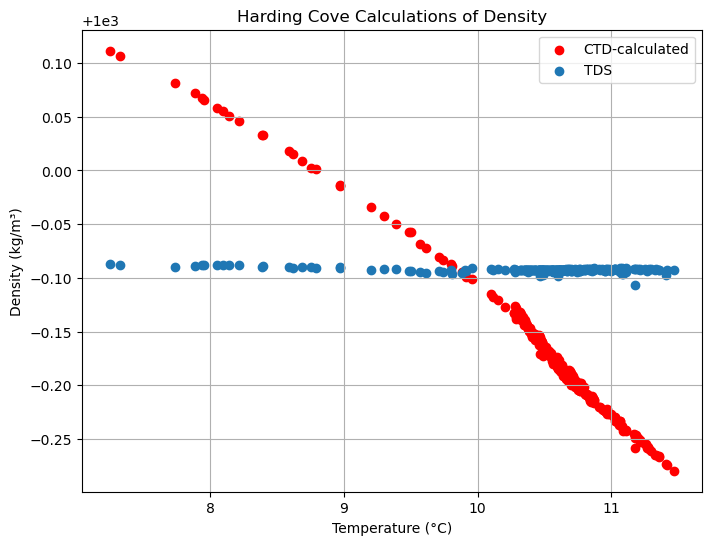

In [146]:
fig, ax = plt.subplots(figsize=(8, 6))

ax.scatter(HAR_17['Temperature (°C)'], HAR_17['Density (kg/m³)'],label='CTD-calculated', c='red')
#ax.scatter(KEY_18['Temperature (°C)'], KEY_18['Density (kg/m³)'],label='CTD-calculated', c='purple')
ax.scatter(HAR_17['Temperature (°C)'], rho, label='TDS')
#ax.plot(t_vals, rho_gsw, label='GSW TEOS-10')
#ax.scatter(HAR_17['Temperature (°C)'], rho_real, label='gsw-calculated')
#ax.scatter(KEY_18['Temperature (°C)'], rho_real, label='gsw-calculated')

ax.set_title("Harding Cove Calculations of Density")
ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Density (kg/m³)')
plt.legend()
plt.grid(True)
plt.show()

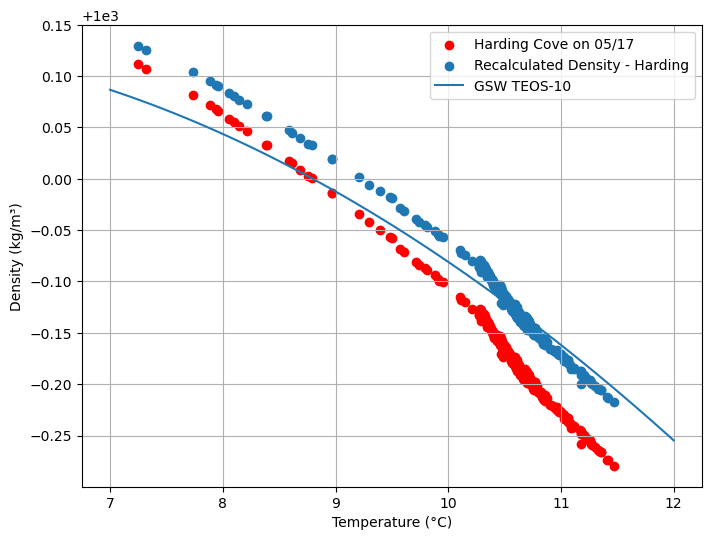

In [37]:
fig, ax = plt.subplots(figsize=(8, 6))

# ax.plot(t_vals, rho, label='EOS80 Manually Programmed')
ax.scatter(HAR_17['Temperature (°C)'], HAR_17['Density (kg/m³)'],label='Harding Cove on 05/17', c='red')
# ax.scatter(KEY_18['Temperature (°C)'], KEY_18['Density (kg/m³)'],label='Keystone Cove on 5/18', c='orange')
# ax.scatter(HAR_17['Temperature (°C)'], rho_gsw_recalculated, label='Recalculated Density - Harding')
ax.plot(t_vals, rho_gsw, label='GSW TEOS-10')

ax.set_xlabel('Temperature (°C)')
ax.set_ylabel('Density (kg/m³)')
plt.legend()
plt.grid(True)
plt.show()
